**Imports**

In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from random import randint
from tensorflow.keras import layers,models
from keras.layers import Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

2024-03-23 06:32:44.678502: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 06:32:44.678600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 06:32:44.779989: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Data loading**

In [24]:
classes_path = 'C:/Users/User1/Downloads/Mango/'

class_names = sorted(os.listdir(classes_path))
num_classes = len(class_names)

img_size = (224, 224, 3)

print(f'class names: {class_names}\nclasses number: {num_classes}')

class names: ['Anthracnose', 'Bacterial Canker', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']
classes number: 6


In [25]:
images = []
labels = []

print('images:\n')
for cl in class_names:
    print(cl, end=' -> ')
    for img in os.listdir(classes_path + cl):
        # labels will be in vector form, e.g. [0, 1, 0, 0]
        label = np.zeros(num_classes)
        label[class_names.index(cl)] = 1
        labels.append(label)
    
        images.append(np.asarray(Image.open(classes_path + cl + '/' + img).resize(img_size[0:2])))
    print('done')

    
labels = np.asarray(labels)
images = np.asarray(images)

print(f'\n\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')

images:

Anthracnose -> done
Bacterial Canker -> done
Gall Midge -> done
Healthy -> done
Powdery Mildew -> done
Sooty Mould -> done


labels shape: (3000, 6)
images shape: (3000, 224, 224, 3)


**Data visualization**

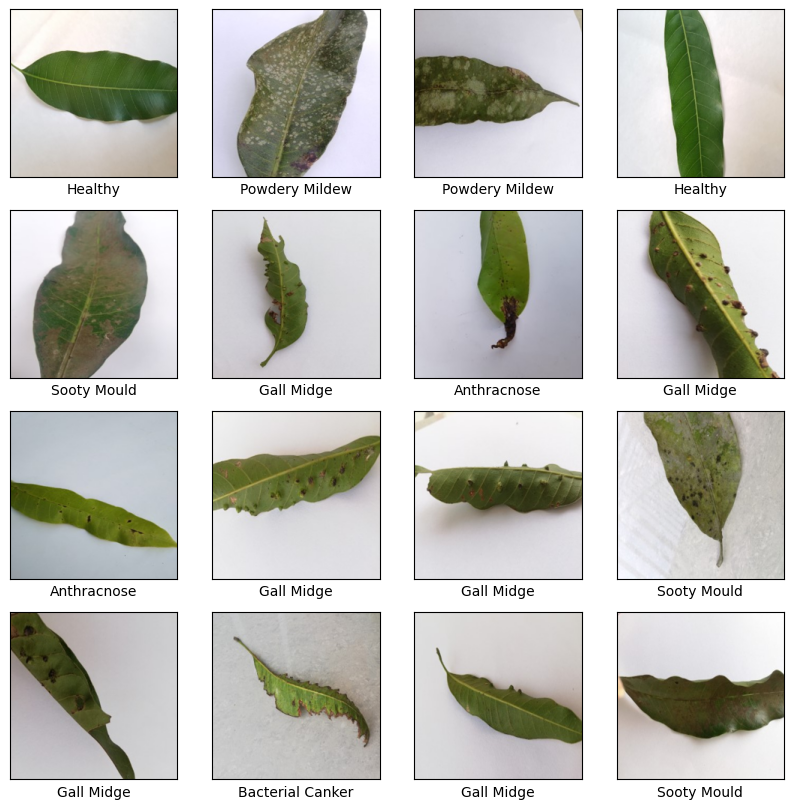

In [26]:
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for x in range(4):
    for y in range(4):
        i = randint(0, len(images))
        
        axs[x][y].imshow(images[i])
        
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])
        
plt.show()

**Train val test split**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 

In [29]:
print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_val.shape}\nvalidation labels shape: {y_val.shape}\n\nTest images shape: {X_test.shape}\nTest labels shape: {y_test.shape}')

train images shape: (1800, 224, 224, 3)
train labels shape: (1800, 6)

validation images shape: (600, 224, 224, 3)
validation labels shape: (600, 6)

Test images shape: (600, 224, 224, 3)
Test labels shape: (600, 6)


**Model**

In [35]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Rescaling(scale=1. / 255, input_shape=(224,224,3)))
#block 1
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding="same", activation="relu"))
#block 2
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding="same", activation="relu"))
#block 3
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(2,2),padding="same", activation="relu"))
#block 4
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),strides=(2,2),padding="same", activation="relu"))
#block 5
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),strides=(2,2),padding="same", activation="relu"))
#Flatten layer
model.add(tf.keras.layers.Flatten())
#Classification part
model.add(tf.keras.layers.Dense(units=4096,activation="relu"))
model.add(tf.keras.layers.Dense(units=4096,activation="relu"))
model.add(tf.keras.layers.Dense(units=4096,activation="relu"))
model.add(tf.keras.layers.Dense(units=6, activation="softmax"))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │        24,582 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,066,438 (576.27 MB)

 Trainable params: 151,066,438 (576.27 MB)

 Non-trainable params: 0 (0.00 B)

None


In [33]:
history=model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7419 - loss: 0.7323

W0000 00:00:1711176374.294053      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.7421 - loss: 0.7317 - val_accuracy: 0.9400 - val_loss: 0.2068
Epoch 2/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.7959 - loss: 0.5650 - val_accuracy: 0.9500 - val_loss: 0.1596
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8577 - loss: 0.4021 - val_accuracy: 0.9800 - val_loss: 0.1048
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8437 - loss: 0.4053 - val_accuracy: 0.9700 - val_loss: 0.1053
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8607 - loss: 0.3769 - val_accuracy: 0.9800 - val_loss: 0.0615
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8814 - loss: 0.3322 - val_accuracy: 0.9900 - val_loss: 0.0284
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8990 - loss: 0.2903 - val_accuracy: 0.9833 - val_loss: 0.0626
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8891 - loss: 0.3111 - val_accuracy: 0.9833 - val_

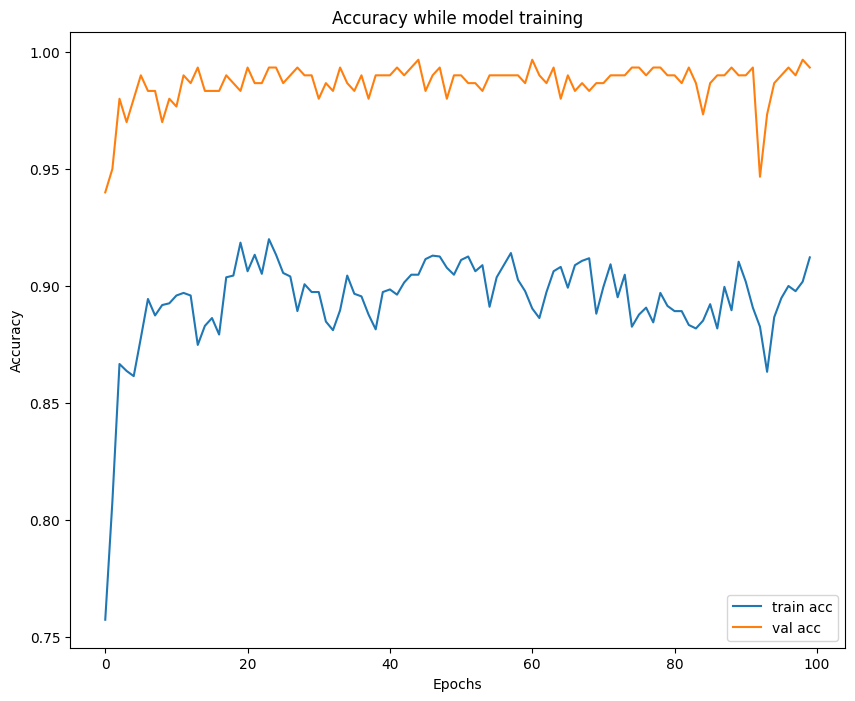

In [34]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy while model training')
plt.show()

In [39]:
model.evaluate(X_test, y_test, batch_size=32)

y_pred = model.predict(X_test)

y_pred=np.argmax(y_pred,axis=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 1.0000 - loss: 0.0560
 7/19 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

W0000 00:00:1711176955.442067      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 236ms/step


In [41]:
y_test = np.argmax(y_test, axis=1)

In [42]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00        89
           2       1.00      1.00      1.00        98
           3       1.00      1.00      1.00       108
           4       1.00      1.00      1.00       103
           5       1.00      1.00      1.00       105

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



[Text(0, 0.5, 'Anthracnose'),
 Text(0, 1.5, 'BacterialCanker'),
 Text(0, 2.5, 'GallMidge'),
 Text(0, 3.5, 'Healthy'),
 Text(0, 4.5, 'PowderyMildew'),
 Text(0, 5.5, 'SootyMould')]

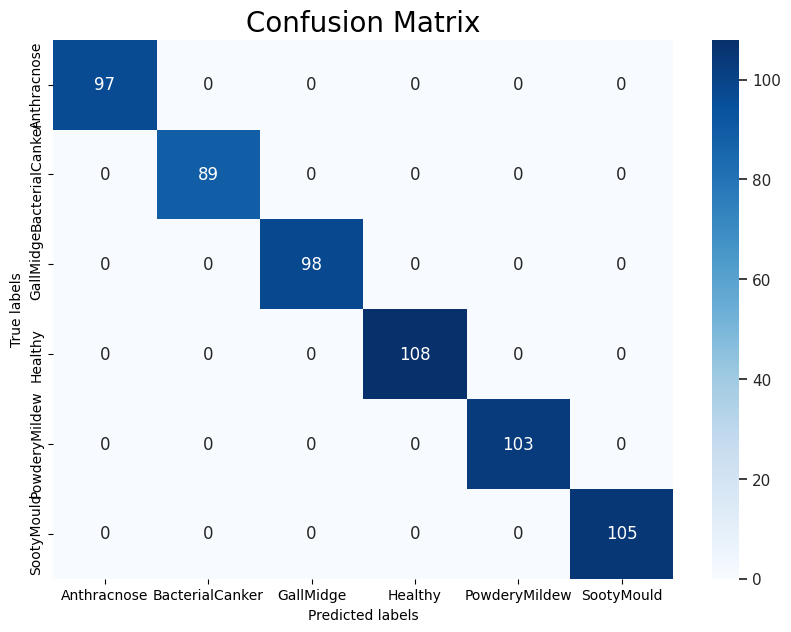

In [44]:
cm = confusion_matrix(y_pred,y_test)

plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=ax);

# Labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=10);
ax.set_ylabel('True labels', fontsize=10);
ax.set_title('Confusion Matrix', fontsize=20);
ax.xaxis.set_ticklabels(['Anthracnose', 'BacterialCanker', 'GallMidge', 'Healthy', 'PowderyMildew', 'SootyMould'], fontsize=10); 
ax.yaxis.set_ticklabels(['Anthracnose', 'BacterialCanker', 'GallMidge', 'Healthy', 'PowderyMildew', 'SootyMould'], fontsize=10)

In [46]:
model.save('mangoNet.h5')